In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)

%matplotlib inline



In [6]:
df = pd.read_csv(r"C:\Users\Vipul\Property-Click-Prediction\notebook\datasets\merged_dataset.csv")

In [7]:
df.sample(5)

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,...,swimming_pool,pin_code,rent,deposit,building_type,photo_count,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day
14389,ff8081815ad0dbb3015ad1ea44db7e64,BHK2,2017-03-15 19:53:00,2,2,6.0,FULLY_FURNISHED,0,13.026718,77.605758,...,0,560032.0,24000,240000,AP,8,1,cat_1_to_2,1.0,cat_1_to_2
5731,ff80818159e52c850159e560ec8410ad,BHK2,2017-02-01 23:19:00,2,3,4.0,SEMI_FURNISHED,0,12.912445,77.622075,...,0,560068.0,19500,80000,AP,7,4,cat_3_to_5,4.0,cat_3_to_5
10033,ff8081815a69bafb015a6a604e696ae4,BHK1,2017-02-23 15:49:00,1,0,0.0,NOT_FURNISHED,0,12.912466,77.577307,...,0,560078.0,6500,80000,IH,0,3,cat_3_to_5,2.0,cat_1_to_2
897,ff8081814fb63c61014fc038932e3e2a,BHK1,2017-03-07 11:04:00,1,0,2.0,SEMI_FURNISHED,0,12.975514,77.506012,...,0,560072.0,7000,30000,IF,0,1,cat_1_to_2,NaN,NaN
5131,ff8081815961d54d015963b9dcde25db,BHK2,2017-03-10 15:06:00,2,0,1.0,SEMI_FURNISHED,0,12.906465,77.542525,...,0,560061.0,12000,200000,IH,3,2,cat_1_to_2,2.0,cat_1_to_2


In [8]:
df.shape

(17386, 26)

In [9]:
df.describe()

,bathroom,floor,total_floor,gym,latitude,longitude,lift,property_age,property_size,swimming_pool,pin_code,rent,deposit,photo_count,request_day_within_7d,request_day_within_3d
count,17386.000000,17386.000000,17363.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,1.722400e+04,17386.000000,1.738600e+04,17386.000000,17386.000000,13210.000000
mean,1.702692,1.726101,3.382077,0.150063,12.958028,77.612853,0.265156,4.789141,912.091510,0.126769,5.616540e+05,13822.809847,1.145386e+05,3.803635,4.013632,2.802801
std,0.716630,2.041864,3.040158,0.357144,0.190519,0.839160,0.441429,8.781275,608.803608,0.332723,9.440637e+04,8272.442456,1.167101e+05,4.231098,5.050688,3.187711
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1000.000000,0.000000e+00,0.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,0.000000,12.911736,77.573633,0.000000,1.000000,507.000000,0.000000,5.600370e+05,8000.000000,5.000000e+04,0.000000,1.000000,1.000000
50%,2.000000,1.000000,3.000000,0.000000,12.956585,77.623147,0.000000,3.000000,875.000000,0.000000,5.600660e+05,12000.000000,1.000000e+05,3.000000,2.000000,2.000000
75%,2.000000,2.000000,4.000000,0.000000,13.003170,77.670982,1.000000,7.000000,1200.000000,0.000000,5.600790e+05,18000.000000,1.500000e+05,6.000000,5.000000,3.000000
max,21.000000,24.000000,38.000000,1.000000,19.168171,80.215330,1.000000,800.000000,40000.000000,1.000000,5.600092e+06,75000.000000,3.500000e+06,45.000000,111.000000,55.000000


Dropping the column property_id because it wouldn't help in models, also activation_date, latitude, longitude, pin_code, locality wouldn't help in the model

In [11]:
# Dropped those columns that won't have an effect on the number of requests
df = df.drop(['property_id', 'activation_date' ,'latitude', 'longitude', 'pin_code','locality'  ] , axis=1)

In [12]:
# Some info about all columns
print('Column : Num. of null values')
print(dict(df.isna().sum()))
print('\n\n')
print('Column : data type')
print(dict(df.dtypes))

Column : Num. of null values
{'type': 0, 'bathroom': 0, 'floor': 0, 'total_floor': 23, 'furnishing': 0, 'gym': 0, 'lease_type': 0, 'lift': 0, 'parking': 0, 'property_age': 0, 'property_size': 0, 'swimming_pool': 0, 'rent': 0, 'deposit': 0, 'building_type': 38, 'photo_count': 0, 'request_day_within_7d': 0, 'categories_7day': 0, 'request_day_within_3d': 4176, 'categories_3day': 4176}



Column : data type
{'type': dtype('O'), 'bathroom': dtype('int64'), 'floor': dtype('int64'), 'total_floor': dtype('float64'), 'furnishing': dtype('O'), 'gym': dtype('int64'), 'lease_type': dtype('O'), 'lift': dtype('int64'), 'parking': dtype('O'), 'property_age': dtype('int64'), 'property_size': dtype('int64'), 'swimming_pool': dtype('int64'), 'rent': dtype('int64'), 'deposit': dtype('int64'), 'building_type': dtype('O'), 'photo_count': dtype('int64'), 'request_day_within_7d': dtype('int64'), 'categories_7day': dtype('O'), 'request_day_within_3d': dtype('float64'), 'categories_3day': dtype('O')}


After seeing this information about the data, we can handle null values in columns [total_floor, building_type] in the following steps. The null values in columns [request_day_within_3d, categories_3day] are normal because there are more requests within 7 days than requests within 3 days and we will handle these nulls in the modeling part. The data type is correct for every column.

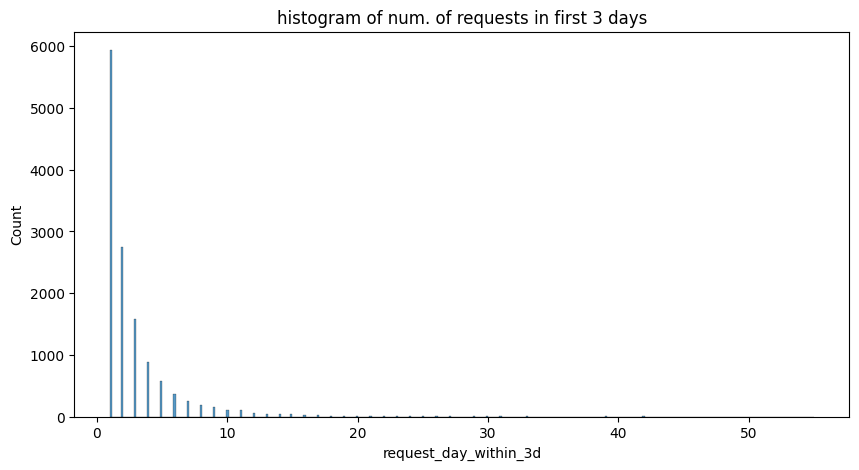

In [13]:
# Show histogram of the number of requests in first 3 days
plt.figure(figsize=(10,5))
sns.histplot(df, x="request_day_within_3d")

plt.title('histogram of num. of requests in first 3 days')
plt.show()

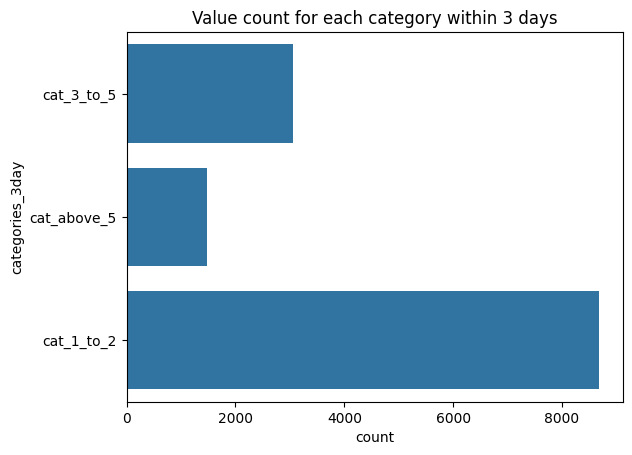

In [14]:
sns.countplot(y=df.categories_3day)
plt.title('Value count for each category within 3 days')
plt.show()

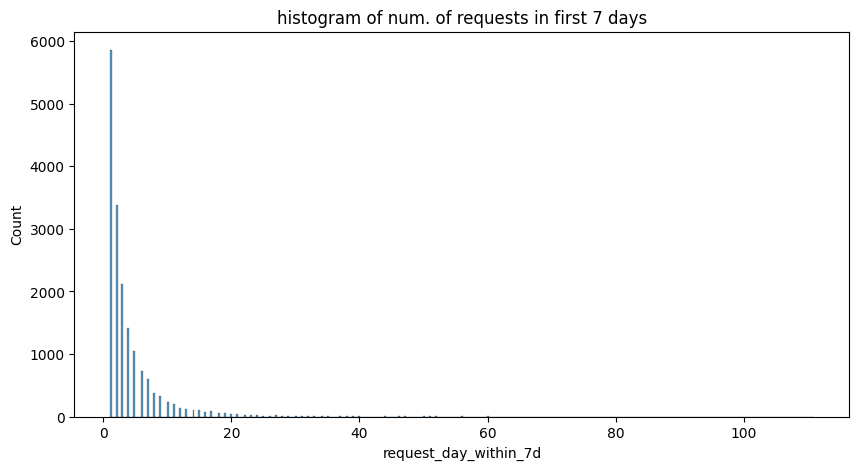

In [15]:
# Show histogram of the number of requests in first 7 days
plt.figure(figsize=(10,5))
sns.histplot(df, x="request_day_within_7d")

plt.title('histogram of num. of requests in first 7 days')
plt.show()

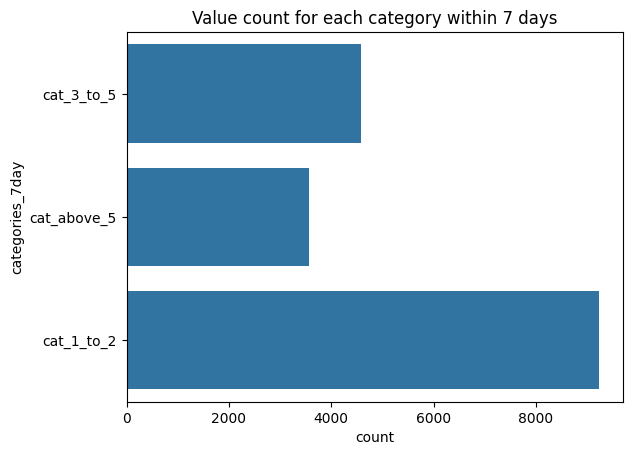

In [16]:
sns.countplot(y=df.categories_7day)
plt.title('Value count for each category within 7 days')
plt.show()


In the following steps, we'll divide data into categorical and numeric columns to analyze both of them separately.

In [18]:
# Get categorical columns  
df_cat = df.select_dtypes(include=['object'])
# Get numeric columns
df_num = df.select_dtypes(exclude=['object'])

print("Categorical Columns : \n",list(df_cat.columns) )
print("Numeric Columns : \n",list(df_num.columns) )

Categorical Columns : 
 ['type', 'furnishing', 'lease_type', 'parking', 'building_type', 'categories_7day', 'categories_3day']
Numeric Columns : 
 ['bathroom', 'floor', 'total_floor', 'gym', 'lift', 'property_age', 'property_size', 'swimming_pool', 'rent', 'deposit', 'photo_count', 'request_day_within_7d', 'request_day_within_3d']


In [19]:
df_cat.sample(2)


,type,furnishing,lease_type,parking,building_type,categories_7day,categories_3day
5077,BHK1,SEMI_FURNISHED,ANYONE,NONE,IF,cat_3_to_5,cat_1_to_2
9525,BHK2,FULLY_FURNISHED,ANYONE,BOTH,AP,cat_1_to_2,cat_1_to_2


In [20]:
df_num.sample(2)


,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count,request_day_within_7d,request_day_within_3d
15714,2,0,4.0,0,1,0,1300,0,12000,150000,0,4,2.0
9873,1,2,2.0,0,0,10,500,0,10000,100000,0,1,1.0


In [21]:
# Show all values and get count of them in every categorical column
for col in df_cat.columns[:-2]:
    print('Column Name : ', col)
    print(df_cat[col].value_counts())
    print('\n-------------------------------------------------------------\n')

Column Name :  type
type
BHK2        8510
BHK1        4508
BHK3        2691
RK1         1497
BHK4         157
BHK4PLUS      23
Name: count, dtype: int64

-------------------------------------------------------------

Column Name :  furnishing
furnishing
SEMI_FURNISHED     13523
NOT_FURNISHED       2917
FULLY_FURNISHED      946
Name: count, dtype: int64

-------------------------------------------------------------

Column Name :  lease_type
lease_type
FAMILY      8401
ANYONE      8026
BACHELOR     928
COMPANY       31
Name: count, dtype: int64

-------------------------------------------------------------

Column Name :  parking
parking
TWO_WHEELER     8059
BOTH            7771
NONE             921
FOUR_WHEELER     635
Name: count, dtype: int64

-------------------------------------------------------------

Column Name :  building_type
building_type
IF    10171
AP     6000
IH     1177
Name: count, dtype: int64

-------------------------------------------------------------



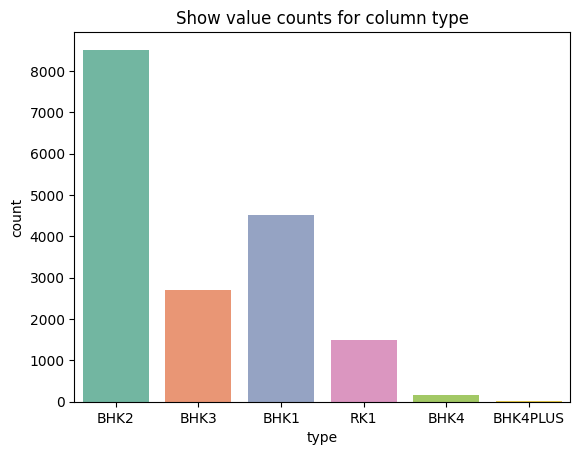

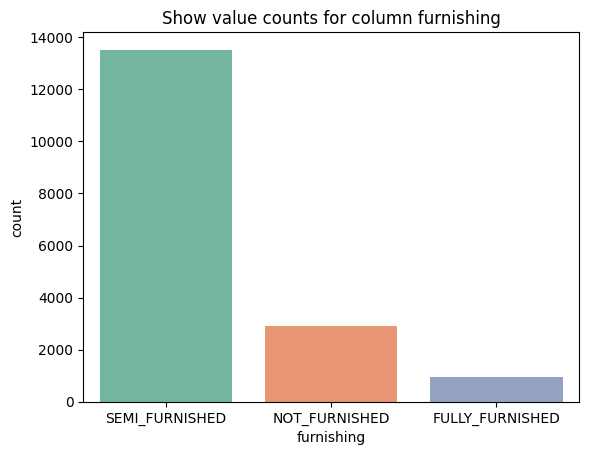

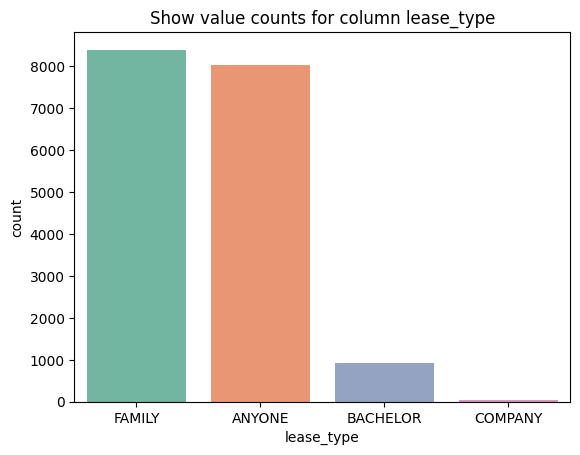

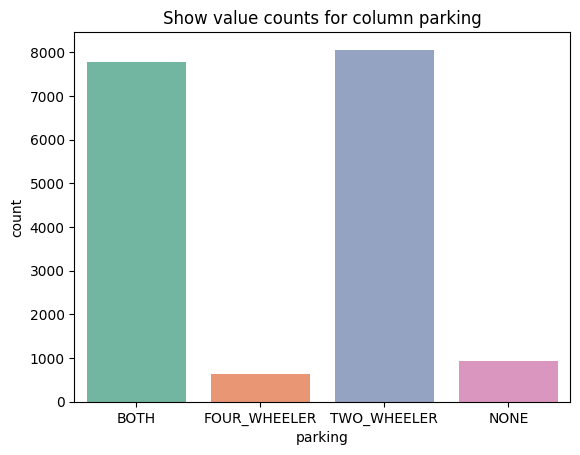

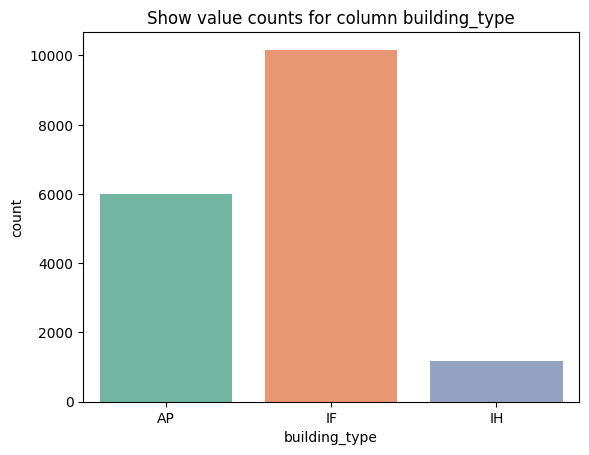

In [22]:
palette = sns.color_palette("Set2")

# Plot count of values in every column
for col in df_cat.columns[:-2]:
    sns.countplot(x=col, data=df, palette=palette)
    plt.title(f'Show value counts for column {col}')

    
    plt.show()

Now we can see in columns:

1. type: 'BHK4PLUS' has minimum count and 'BHK2' maximum count
2. furnishing: 'FULLY_FURNISHED' has minimum count and 'SEMI_FURNISHED' maximum count
3. lease_type: 'COMPANY' has minimum count and 'FAMILY' maximum count;
4. parking: 'FOUR_WHEELER' has minimum count and 'TWO_WHEELER' maximum count
5. building_type: 'IH' has minimum count and 'IF' maximum count

Now let's take a look at numeric data.

In [23]:
df_num.head()

,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count,request_day_within_7d,request_day_within_3d
0,1,3,4.0,1,1,2,850,1,12000,120000,7,4,4.0
1,2,4,11.0,1,1,1,1233,1,20000,150000,0,5,3.0
2,2,0,4.0,1,1,0,1200,0,15000,75000,12,22,15.0
3,2,3,4.0,0,0,1,1300,0,17000,150000,9,7,5.0
4,1,1,2.0,0,0,4,450,0,6500,40000,7,52,25.0


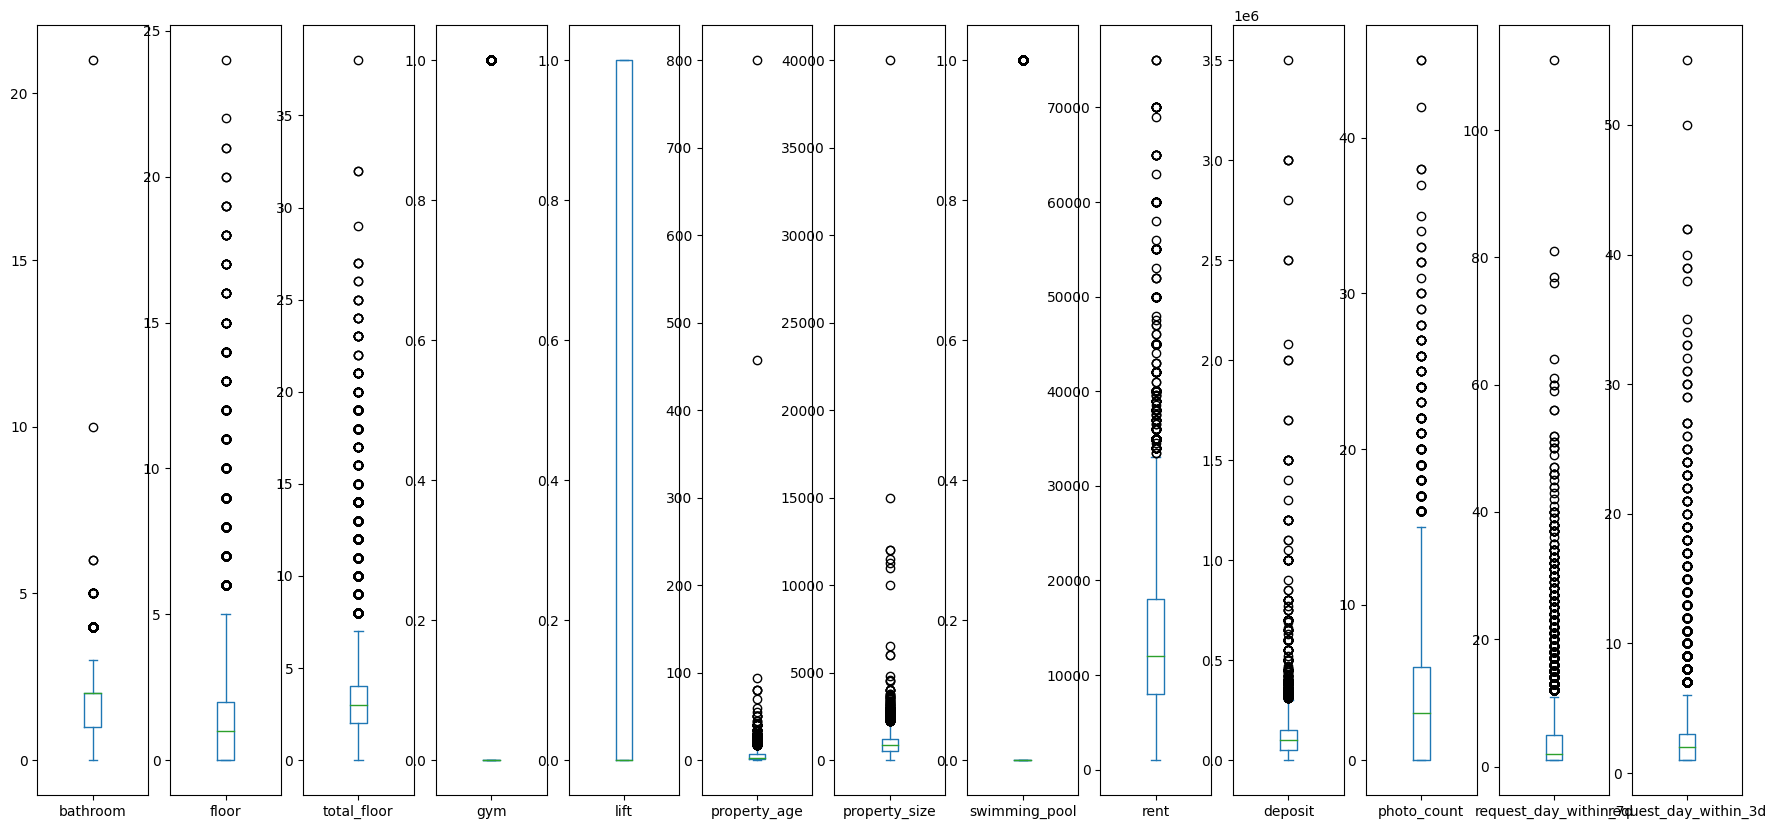

In [24]:
# Box Plot to show ranges of values and outliers
df_num.plot(kind='box', subplots=True,  sharex=False, sharey=False,figsize=(22,10))
plt.show()

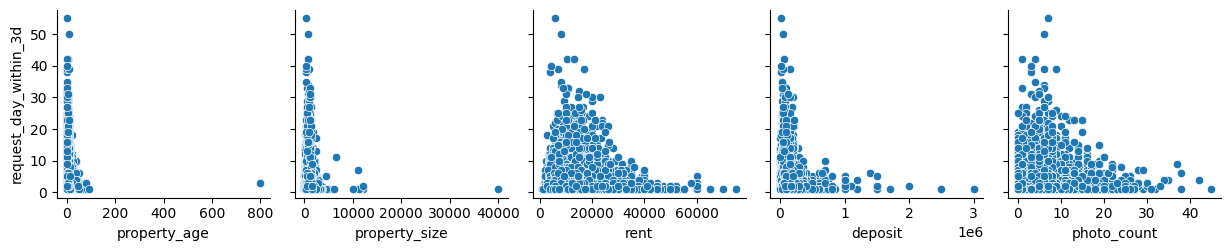

In [26]:
sns.pairplot(data=df,
                  x_vars=['property_age', 'property_size','rent', 'deposit', 'photo_count'],
                  y_vars=['request_day_within_3d']
             
                  )
plt.show()

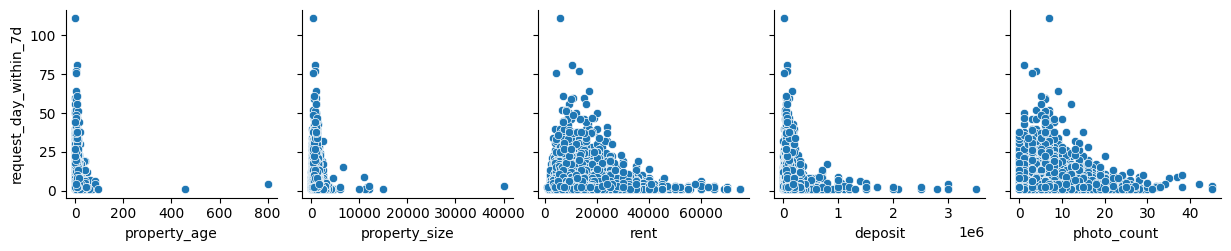

In [27]:
sns.pairplot(data=df,
                  x_vars=['property_age', 'property_size','rent', 'deposit', 'photo_count'],
                  y_vars=['request_day_within_7d']
             
                  )
plt.show()

After exploring the data, we can find there are many outlier values that need to be handled. We'll do it in the following steps.

# Feature Engineering



In this section, we will apply some changes in the data to make it ready for the Modeling part, such as:

1. Removing outliers using the IQR method

2. Encoding categorical data

3. Using the MinMaxScaler to scale numeric data

Remove Outliers

Remove Outliers from numeric data using the Interquartile Range (IQR) method.

The Interquartile Range (IQR) method uses the 25th and 75th percentiles (quartiles) to identify outliers in a dataset. Outliers are defined as observations that fall below the 25th percentile minus 1.5 times the IQR or above the 75th percentile plus 1.5 times the IQR. This method is useful as it considers the variability within the data, rather than using fixed threshold values.

In [29]:
# Function to remove outliers using quantiles 
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q1 - 2 * iqr
    fence_high = q3 + 2 * iqr
    df_out = df_in.loc[(df_in[col_name] <= fence_high) & (df_in[col_name] >= fence_low)]
    return df_out

In [30]:
df_num.columns

Index(['bathroom', 'floor', 'total_floor', 'gym', 'lift', 'property_age',
       'property_size', 'swimming_pool', 'rent', 'deposit', 'photo_count',
       'request_day_within_7d', 'request_day_within_3d'],
      dtype='object')

We apply the outlier function on all numeric columns except the target columns request_day_within_3d, request_day_within_7d and binary columns like gym, lift, swimming_pool

In [31]:
dataset = df.copy()
for col in df_num.columns:
    if col in ['gym', 'lift', 'swimming_pool',  'request_day_within_3d', 'request_day_within_7d']:
        continue
        
    dataset = remove_outlier(dataset , col)

In [32]:
dataset.head(5)

,type,bathroom,floor,total_floor,furnishing,gym,lease_type,lift,parking,property_age,property_size,swimming_pool,rent,deposit,building_type,photo_count,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day
0,BHK2,1,3,4.0,SEMI_FURNISHED,1,FAMILY,1,BOTH,2,850,1,12000,120000,AP,7,4,cat_3_to_5,4.0,cat_3_to_5
2,BHK2,2,0,4.0,NOT_FURNISHED,1,ANYONE,1,FOUR_WHEELER,0,1200,0,15000,75000,AP,12,22,cat_above_5,15.0,cat_above_5
3,BHK3,2,3,4.0,SEMI_FURNISHED,0,ANYONE,0,BOTH,1,1300,0,17000,150000,AP,9,7,cat_above_5,5.0,cat_3_to_5
4,BHK1,1,1,2.0,SEMI_FURNISHED,0,ANYONE,0,BOTH,4,450,0,6500,40000,IF,7,52,cat_above_5,25.0,cat_above_5
5,BHK3,2,2,2.0,SEMI_FURNISHED,1,ANYONE,0,TWO_WHEELER,8,1200,1,17500,200000,IF,3,1,cat_1_to_2,NaN,NaN


We use Capping for outliers in target columns. Capping refers to replacing the outliers with a near value so that we can keep the point in our analysis while avoiding skewing the data.

Let's see data after removing some outliers

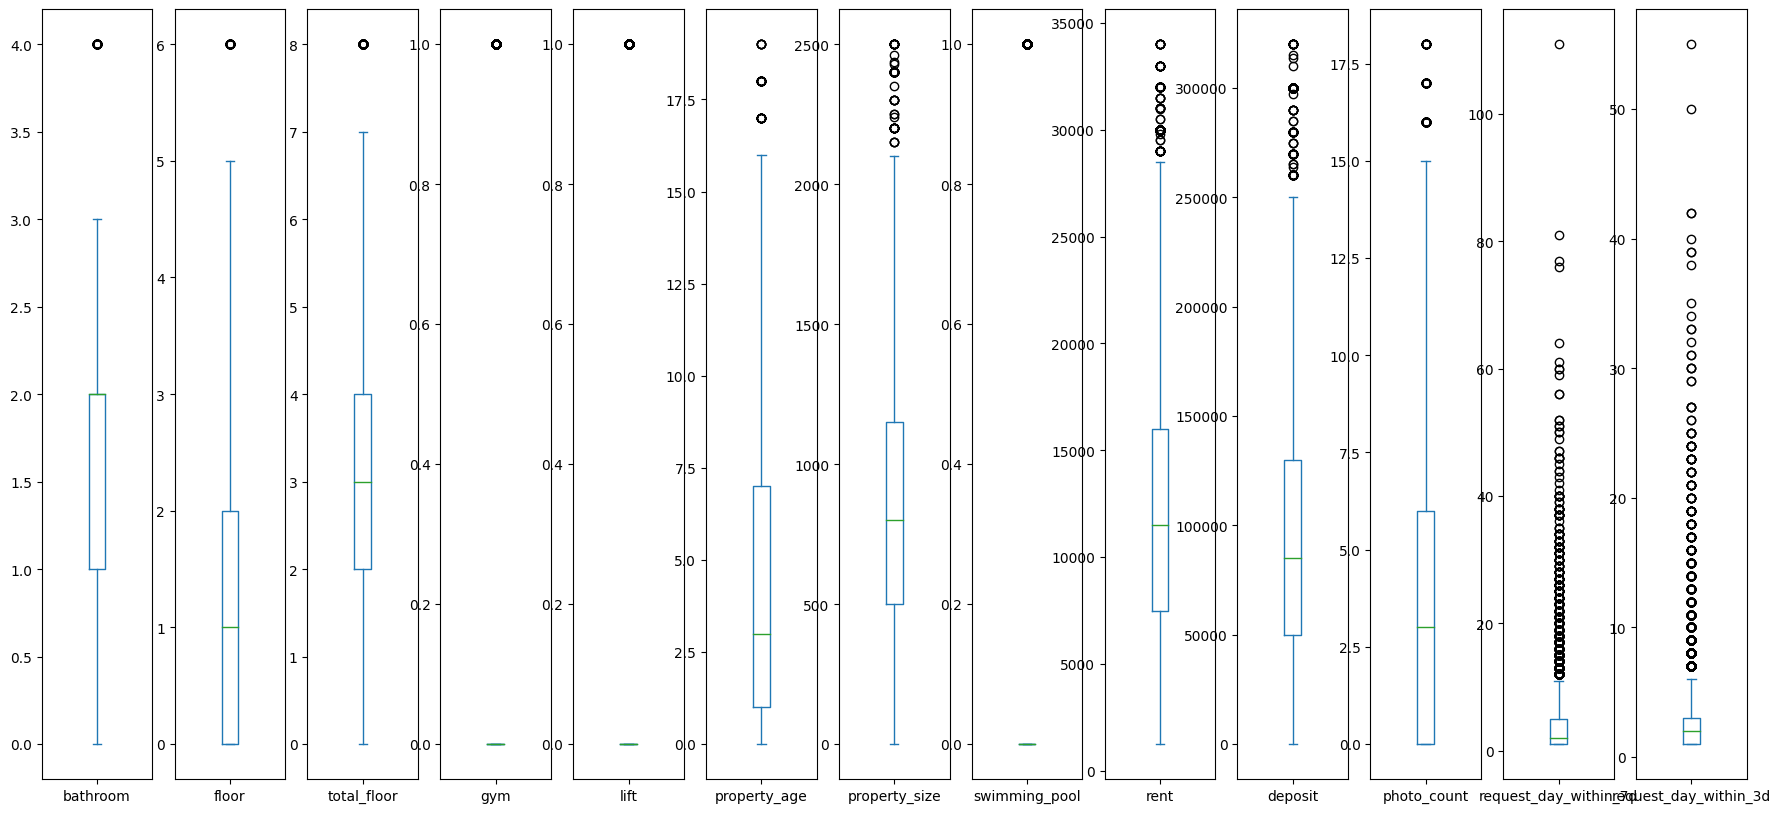

In [34]:
# Box Plot after removing some values
dataset.plot(kind='box', subplots=True,  sharex=False, sharey=False,figsize=(22,10))
plt.show()

In [35]:
def capping_for_3days(x):
    num = 10
    if x > num:
        return num
    else :
        return x
def capping_for_7days(x):
    num = 20
    if x > num:
        return num
    else :
        return x

In [36]:
dataset['request_day_within_3d_capping'] = dataset['request_day_within_3d'].apply(capping_for_3days)
dataset['request_day_within_7d_capping'] = dataset['request_day_within_7d'].apply(capping_for_7days)

In [37]:
dataset['request_day_within_3d_capping'].value_counts()

request_day_within_3d_capping
1.0     5115
2.0     2403
3.0     1404
4.0      795
5.0      532
10.0     495
6.0      339
7.0      228
8.0      168
9.0      140
Name: count, dtype: int64

In [39]:
dataset['request_day_within_7d_capping'].value_counts()[:10]

request_day_within_7d_capping
1     4934
2     2923
3     1848
4     1264
5      937
6      663
7      549
8      330
20     319
9      292
Name: count, dtype: int64

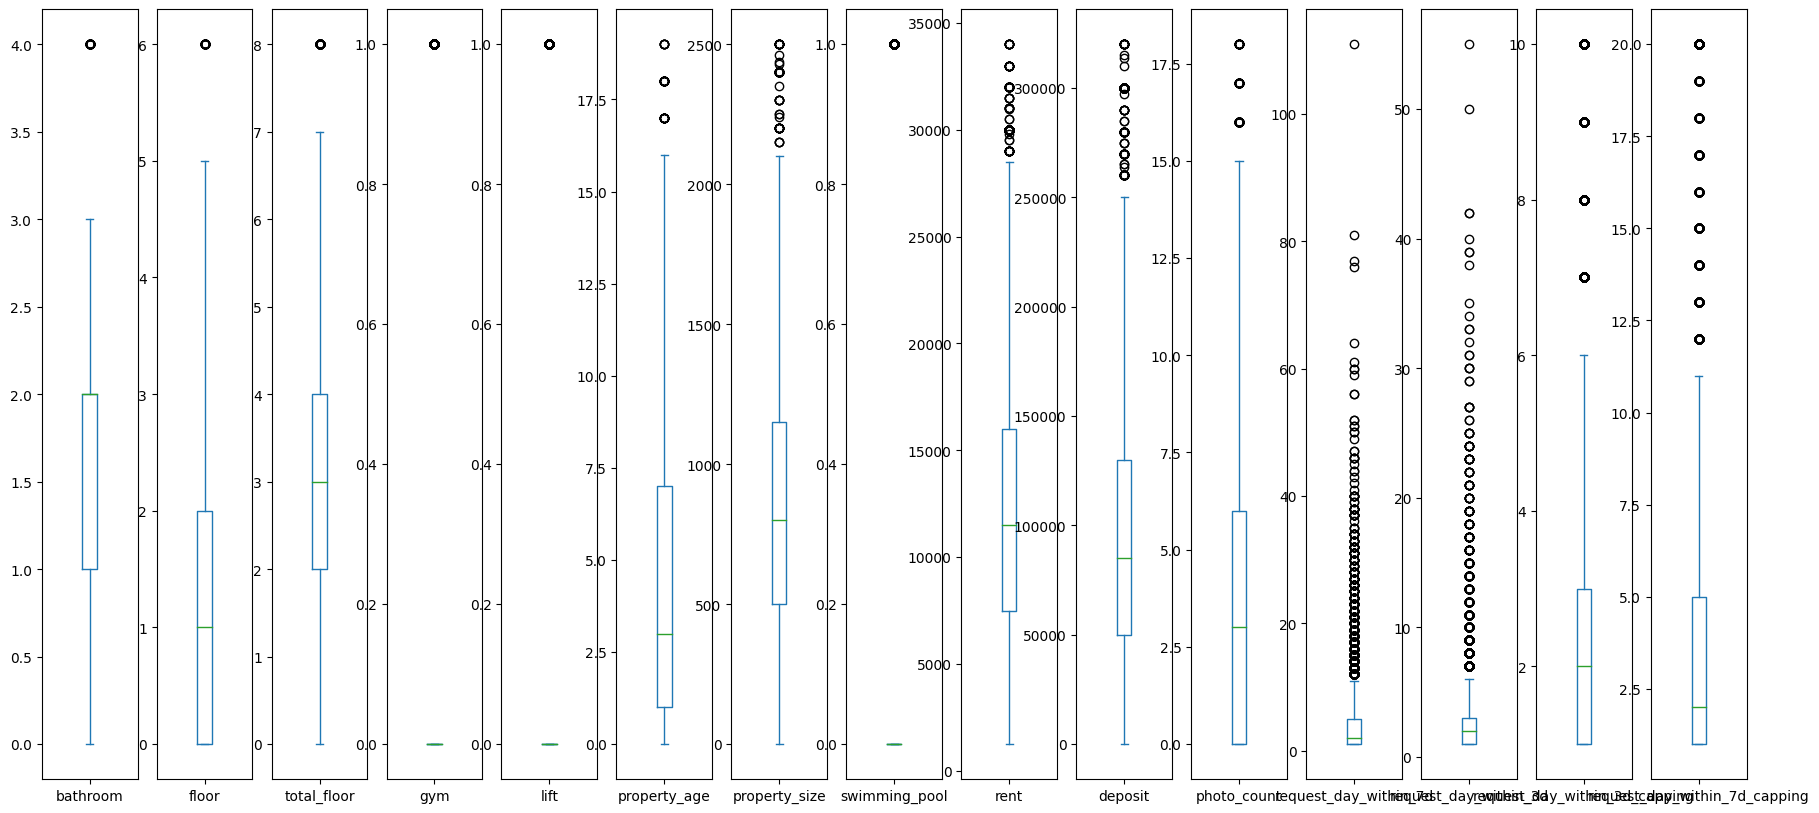

In [40]:
# Box Plot after removing some values
dataset.plot(kind='box', subplots=True,  sharex=False, sharey=False,figsize=(22,10))
plt.show()

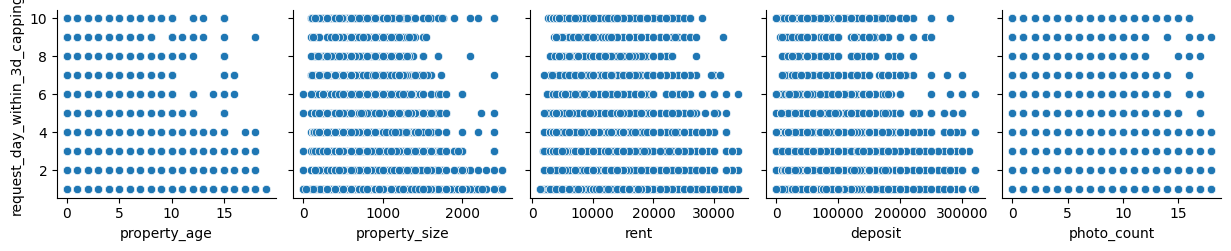

In [41]:
sns.pairplot(data=dataset,
                  x_vars=['property_age', 'property_size','rent', 'deposit', 'photo_count'],
                  y_vars=['request_day_within_3d_capping']
                  )
plt.show()

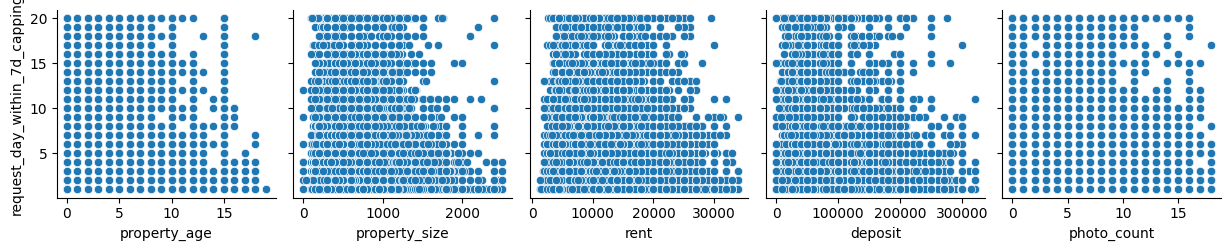

In [42]:
sns.pairplot(data=dataset,
                  x_vars=['property_age', 'property_size','rent', 'deposit', 'photo_count'],
                  y_vars=['request_day_within_7d_capping']
                  )
plt.show()

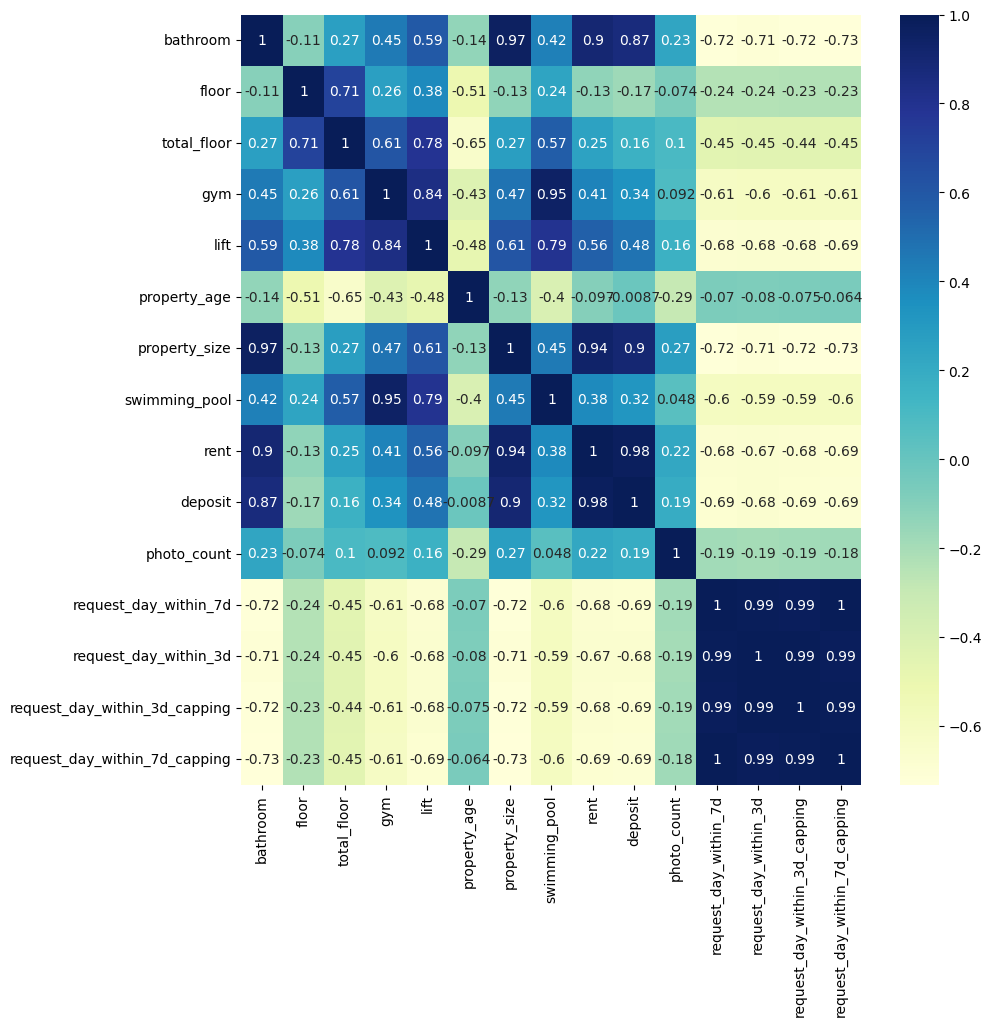

In [44]:
# Exclude non-numeric columns from correlation analysis
numeric_data = dataset.select_dtypes(include=['int', 'float'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Show a correlation on a heat map.
plt.subplots(figsize=(10,10))
dataplot = sns.heatmap(correlation_matrix.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()